In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

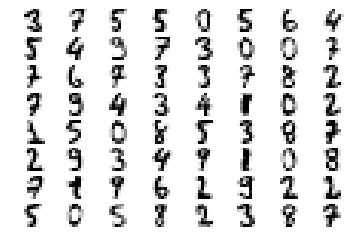

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = X[digits_indexes].shape[0]
x_inputs =[tuple(c) for c in X[digits_indexes].tolist()]
x_outputs = [tuple(c) for c in y[digits_indexes].reshape(samplesize,1).tolist()]

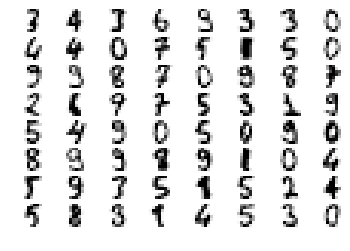

In [6]:
from random import randint
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(np.array(x_inputs[randint(0, samplesize)]).reshape(8,8), cmap='Greys')
plt.show()

In [7]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        outputs = []
        for xi in x_inputs:
            output = net.activate(xi)
            outputs.append(output)
        
        
        px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
        # the index of maximum in each line
        pred_outputs = np.argmax(px_outputs, axis = 1)
        # replace index to real number, from higher number to lower number!!
        for i in range(number_of_classification):
            index = number_of_classification - i - 1
            pred_outputs[pred_outputs==index] = numbers[index]
        
        real_outputs = np.array(x_outputs).reshape(samplesize,)
        
        acc = np.sum(pred_outputs == real_outputs)/samplesize

        genome.fitness = acc

def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # add a stdout reporter to show progress in the terminal
    reporter = neat.StdOutReporter(False)
    p.add_reporter(reporter)
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    #checkpointer = neat.Checkpointer(100)
    #p.add_reporter(checkpointer)
    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 1500)

    return [stats, winner]


samplesize = len(x_outputs)

local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist10")
[stats, winner] = run(config_path)

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)


 ****** Running generation 0 ****** 

Population's average fitness: 0.10185 stdev: 0.03806
Best fitness: 0.21274 - size: (10, 64) - species 1 - id 166
Average adjusted fitness: 0.088
Mean genetic distance 2.822, standard deviation 0.303
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 14.002 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.11890 stdev: 0.03948
Best fitness: 0.21274 - size: (10, 64) - species 8 - id 166
Average adjusted fitness: 0.096
Mean genetic distance 2.922, standard deviation 0.341
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 13.548 sec (13.775 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.12731 stdev: 0.04064
Best fitness: 0.26902 - size: (11, 65) - species 11 - id 457
Average adjusted fitness: 0.104
Mean genetic distance 2.944, standard deviation 0.351
Population of 201 members in 46 species
Total extinctions: 0
Generation time: 15.879 sec (

Population's average fitness: 0.15852 stdev: 0.05424
Best fitness: 0.31045 - size: (14, 73) - species 17 - id 2161
Average adjusted fitness: 0.112
Mean genetic distance 3.136, standard deviation 0.446
Population of 192 members in 26 species
Total extinctions: 0
Generation time: 19.158 sec (17.618 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.15914 stdev: 0.05697
Best fitness: 0.31045 - size: (14, 73) - species 17 - id 2161
Average adjusted fitness: 0.147
Mean genetic distance 3.135, standard deviation 0.444
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 18.896 sec (17.647 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.16402 stdev: 0.05389
Best fitness: 0.31045 - size: (14, 73) - species 17 - id 2161
Average adjusted fitness: 0.120
Mean genetic distance 3.148, standard deviation 0.458
Population of 194 members in 25 species
Total extinctions: 0
Generation time: 15.483 sec (17.381 average)

Population's average fitness: 0.17827 stdev: 0.06144
Best fitness: 0.37477 - size: (16, 69) - species 16 - id 6801
Average adjusted fitness: 0.131
Mean genetic distance 3.160, standard deviation 0.526
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 17.650 sec (17.915 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.17201 stdev: 0.06568
Best fitness: 0.37477 - size: (16, 69) - species 16 - id 6801
Average adjusted fitness: 0.150
Mean genetic distance 3.146, standard deviation 0.517
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 16.801 sec (17.843 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.17874 stdev: 0.05750
Best fitness: 0.37477 - size: (16, 69) - species 16 - id 6801
Average adjusted fitness: 0.134
Mean genetic distance 3.170, standard deviation 0.500
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 17.338 sec (17.866 average)

Population's average fitness: 0.18623 stdev: 0.06669
Best fitness: 0.37477 - size: (16, 69) - species 16 - id 6801
Average adjusted fitness: 0.169
Mean genetic distance 3.195, standard deviation 0.568
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 17.797 sec (17.915 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.18396 stdev: 0.06278
Best fitness: 0.37477 - size: (16, 69) - species 16 - id 6801
Average adjusted fitness: 0.139
Mean genetic distance 3.213, standard deviation 0.552
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 18.041 sec (17.943 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.18340 stdev: 0.06653
Best fitness: 0.37477 - size: (16, 69) - species 16 - id 6801
Average adjusted fitness: 0.181
Mean genetic distance 3.225, standard deviation 0.560
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 17.726 sec (17.971 average)

Population's average fitness: 0.19476 stdev: 0.07278
Best fitness: 0.37477 - size: (16, 69) - species 16 - id 6801
Average adjusted fitness: 0.160
Mean genetic distance 3.208, standard deviation 0.640
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 18.488 sec (18.591 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.20069 stdev: 0.06754
Best fitness: 0.37477 - size: (16, 69) - species 16 - id 6801
Average adjusted fitness: 0.169
Mean genetic distance 3.217, standard deviation 0.653
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 21.354 sec (18.828 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.19833 stdev: 0.06884
Best fitness: 0.37477 - size: (16, 69) - species 16 - id 6801
Average adjusted fitness: 0.144
Mean genetic distance 3.211, standard deviation 0.660
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 23.124 sec (19.279 average)

Population's average fitness: 0.19962 stdev: 0.07048
Best fitness: 0.38219 - size: (27, 87) - species 2 - id 16741
Average adjusted fitness: 0.147
Mean genetic distance 3.166, standard deviation 0.643
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 17.759 sec (19.320 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.20267 stdev: 0.06804
Best fitness: 0.38219 - size: (27, 87) - species 2 - id 16741
Average adjusted fitness: 0.130
Mean genetic distance 3.162, standard deviation 0.636
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 17.330 sec (19.248 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.19863 stdev: 0.06594
Best fitness: 0.38219 - size: (27, 87) - species 2 - id 16741
Average adjusted fitness: 0.174
Mean genetic distance 3.160, standard deviation 0.665
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 17.574 sec (19.210 average)


Population's average fitness: 0.18968 stdev: 0.06676
Best fitness: 0.38219 - size: (27, 87) - species 2 - id 16741
Average adjusted fitness: 0.125
Mean genetic distance 2.857, standard deviation 0.543
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 17.790 sec (17.583 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.19853 stdev: 0.06653
Best fitness: 0.38219 - size: (27, 87) - species 2 - id 16741
Average adjusted fitness: 0.136
Mean genetic distance 2.860, standard deviation 0.525
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 17.708 sec (17.684 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.19497 stdev: 0.06646
Best fitness: 0.38219 - size: (27, 87) - species 2 - id 16741
Average adjusted fitness: 0.113
Mean genetic distance 2.898, standard deviation 0.516
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 17.649 sec (17.710 averag

Population's average fitness: 0.20720 stdev: 0.06721
Best fitness: 0.42362 - size: (23, 82) - species 60 - id 26929
Average adjusted fitness: 0.143
Mean genetic distance 2.891, standard deviation 0.580
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 17.818 sec (18.143 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.20622 stdev: 0.06727
Best fitness: 0.42362 - size: (23, 82) - species 60 - id 26929
Average adjusted fitness: 0.133
Mean genetic distance 2.890, standard deviation 0.576
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 17.773 sec (18.065 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.20528 stdev: 0.06782
Best fitness: 0.42362 - size: (23, 82) - species 60 - id 26929
Average adjusted fitness: 0.124
Mean genetic distance 2.916, standard deviation 0.602
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 17.878 sec (18.047 ave

Population's average fitness: 0.19321 stdev: 0.07070
Best fitness: 0.42362 - size: (23, 82) - species 60 - id 26929
Average adjusted fitness: 0.151
Mean genetic distance 3.032, standard deviation 0.596
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 18.227 sec (18.402 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.19169 stdev: 0.07143
Best fitness: 0.42362 - size: (23, 82) - species 60 - id 26929
Average adjusted fitness: 0.152
Mean genetic distance 3.039, standard deviation 0.586
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 18.307 sec (18.394 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.18902 stdev: 0.06880
Best fitness: 0.42362 - size: (23, 82) - species 60 - id 26929
Average adjusted fitness: 0.140
Mean genetic distance 2.995, standard deviation 0.557
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 19.137 sec (18.425 aver

Population's average fitness: 0.20013 stdev: 0.06694
Best fitness: 0.42362 - size: (23, 82) - species 60 - id 26929
Average adjusted fitness: 0.118
Mean genetic distance 2.986, standard deviation 0.591
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 17.943 sec (18.343 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.18805 stdev: 0.07286
Best fitness: 0.42362 - size: (23, 82) - species 60 - id 26929
Average adjusted fitness: 0.154
Mean genetic distance 2.994, standard deviation 0.585
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 18.517 sec (18.335 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.20098 stdev: 0.07257
Best fitness: 0.42362 - size: (23, 82) - species 60 - id 26929
Average adjusted fitness: 0.134
Mean genetic distance 2.999, standard deviation 0.591
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 18.462 sec (18.355 averag

Population's average fitness: 0.20026 stdev: 0.07186
Best fitness: 0.42362 - size: (23, 82) - species 60 - id 26929
Average adjusted fitness: 0.172
Mean genetic distance 2.945, standard deviation 0.593
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 19.410 sec (18.844 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.19946 stdev: 0.07153
Best fitness: 0.42362 - size: (23, 82) - species 60 - id 26929
Average adjusted fitness: 0.148
Mean genetic distance 2.930, standard deviation 0.595
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 19.405 sec (18.984 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.19748 stdev: 0.07304
Best fitness: 0.42362 - size: (23, 82) - species 60 - id 26929
Average adjusted fitness: 0.166
Mean genetic distance 2.923, standard deviation 0.604
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 19.312 sec (19.094 ave

Population's average fitness: 0.19268 stdev: 0.06661
Best fitness: 0.42362 - size: (23, 82) - species 60 - id 26929
Average adjusted fitness: 0.154
Mean genetic distance 2.815, standard deviation 0.548
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 19.198 sec (18.555 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.18491 stdev: 0.07276
Best fitness: 0.42362 - size: (23, 82) - species 60 - id 26929
Average adjusted fitness: 0.123
Mean genetic distance 2.809, standard deviation 0.534
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 19.378 sec (18.696 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.19355 stdev: 0.06861
Best fitness: 0.42362 - size: (23, 82) - species 60 - id 26929
Average adjusted fitness: 0.155
Mean genetic distance 2.829, standard deviation 0.505
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 19.159 sec (18.876 avera

Population's average fitness: 0.19995 stdev: 0.07380
Best fitness: 0.42362 - size: (23, 82) - species 60 - id 26929
Average adjusted fitness: 0.159
Mean genetic distance 2.837, standard deviation 0.490
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 19.568 sec (19.641 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.20310 stdev: 0.07018
Best fitness: 0.42362 - size: (23, 82) - species 60 - id 26929
Average adjusted fitness: 0.174
Mean genetic distance 2.842, standard deviation 0.471
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 18.972 sec (19.605 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.20874 stdev: 0.06936
Best fitness: 0.42362 - size: (23, 82) - species 60 - id 26929
Average adjusted fitness: 0.141
Mean genetic distance 2.869, standard deviation 0.455
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 19.067 sec (19.543 ave

Population's average fitness: 0.21064 stdev: 0.06892
Best fitness: 0.42362 - size: (23, 82) - species 60 - id 26929
Average adjusted fitness: 0.186
Mean genetic distance 2.709, standard deviation 0.449
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 18.350 sec (18.333 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.21220 stdev: 0.07498
Best fitness: 0.42362 - size: (23, 82) - species 60 - id 26929
Average adjusted fitness: 0.131
Mean genetic distance 2.710, standard deviation 0.449
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 18.292 sec (18.286 average)

 ****** Running generation 314 ****** 

Population's average fitness: 0.21139 stdev: 0.07980
Best fitness: 0.42362 - size: (23, 82) - species 60 - id 26929
Average adjusted fitness: 0.168
Mean genetic distance 2.719, standard deviation 0.472
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 18.481 sec (18.220 averag

Population's average fitness: 0.20712 stdev: 0.07605
Best fitness: 0.42362 - size: (23, 82) - species 60 - id 26929
Average adjusted fitness: 0.133
Mean genetic distance 2.866, standard deviation 0.522
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 18.310 sec (19.056 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.21200 stdev: 0.07007
Best fitness: 0.42362 - size: (23, 82) - species 60 - id 26929
Average adjusted fitness: 0.144
Mean genetic distance 2.850, standard deviation 0.533
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 19.059 sec (19.001 average)

 ****** Running generation 338 ****** 

Population's average fitness: 0.20586 stdev: 0.07478
Best fitness: 0.42362 - size: (23, 82) - species 60 - id 26929
Average adjusted fitness: 0.170
Mean genetic distance 2.888, standard deviation 0.554
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 18.463 sec (18.889 averag

Population's average fitness: 0.20947 stdev: 0.07563
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.162
Mean genetic distance 2.853, standard deviation 0.603
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 17.781 sec (17.926 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.20971 stdev: 0.07412
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.142
Mean genetic distance 2.879, standard deviation 0.594
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 17.801 sec (17.901 average)

 ****** Running generation 362 ****** 

Population's average fitness: 0.20666 stdev: 0.07374
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.156
Mean genetic distance 2.910, standard deviation 0.632
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 17.361 sec (17.866 

Mean genetic distance 2.809, standard deviation 0.591
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 22.194 sec (20.493 average)

 ****** Running generation 384 ****** 

Population's average fitness: 0.21615 stdev: 0.06901
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.189
Mean genetic distance 2.803, standard deviation 0.561
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 20.127 sec (20.435 average)

 ****** Running generation 385 ****** 

Population's average fitness: 0.21553 stdev: 0.07229
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.151
Mean genetic distance 2.826, standard deviation 0.551
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 19.902 sec (20.344 average)

 ****** Running generation 386 ****** 

Population's average fitness: 0.20515 stdev: 0.07379
Best fitness: 0.43537 - size: (40, 105) - speci

Population's average fitness: 0.21459 stdev: 0.07579
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.161
Mean genetic distance 2.664, standard deviation 0.428
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 20.189 sec (20.025 average)

 ****** Running generation 408 ****** 

Population's average fitness: 0.21499 stdev: 0.07519
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.148
Mean genetic distance 2.663, standard deviation 0.440
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 19.912 sec (19.984 average)

 ****** Running generation 409 ****** 

Population's average fitness: 0.22429 stdev: 0.07648
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.194
Mean genetic distance 2.663, standard deviation 0.454
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 20.180 sec (20.037 

Mean genetic distance 2.660, standard deviation 0.398
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 21.424 sec (20.231 average)

 ****** Running generation 431 ****** 

Population's average fitness: 0.19810 stdev: 0.07425
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.135
Mean genetic distance 2.649, standard deviation 0.393
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 22.547 sec (20.581 average)

 ****** Running generation 432 ****** 

Population's average fitness: 0.20598 stdev: 0.07514
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.162
Mean genetic distance 2.651, standard deviation 0.405
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 21.710 sec (20.791 average)

 ****** Running generation 433 ****** 

Population's average fitness: 0.19681 stdev: 0.07232
Best fitness: 0.43537 - size: (40, 105) - speci

Population's average fitness: 0.21415 stdev: 0.07584
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.169
Mean genetic distance 2.691, standard deviation 0.425
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 21.708 sec (23.222 average)

 ****** Running generation 455 ****** 

Population's average fitness: 0.22037 stdev: 0.07416
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.148
Mean genetic distance 2.681, standard deviation 0.422
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 22.069 sec (23.212 average)

 ****** Running generation 456 ****** 

Population's average fitness: 0.21728 stdev: 0.07706
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.181
Mean genetic distance 2.690, standard deviation 0.426
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 20.723 sec (22.9

Mean genetic distance 2.711, standard deviation 0.468
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 21.049 sec (21.991 average)

 ****** Running generation 478 ****** 

Population's average fitness: 0.20355 stdev: 0.07543
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.171
Mean genetic distance 2.708, standard deviation 0.463
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 21.485 sec (21.954 average)

 ****** Running generation 479 ****** 

Population's average fitness: 0.21440 stdev: 0.07605
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.140
Mean genetic distance 2.710, standard deviation 0.460
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 21.224 sec (21.552 average)

 ****** Running generation 480 ****** 

Population's average fitness: 0.20744 stdev: 0.07992
Best fitness: 0.43537 - size: (40, 105) - speci

Population's average fitness: 0.20877 stdev: 0.07368
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.190
Mean genetic distance 2.603, standard deviation 0.331
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 19.186 sec (20.225 average)

 ****** Running generation 502 ****** 

Population's average fitness: 0.20809 stdev: 0.07546
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.148
Mean genetic distance 2.607, standard deviation 0.343
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 19.330 sec (20.123 average)

 ****** Running generation 503 ****** 

Population's average fitness: 0.21471 stdev: 0.07433
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.131
Mean genetic distance 2.630, standard deviation 0.370
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 19.225 sec (20.0

Mean genetic distance 2.621, standard deviation 0.403
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 21.289 sec (21.629 average)

 ****** Running generation 525 ****** 

Population's average fitness: 0.21302 stdev: 0.07374
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.189
Mean genetic distance 2.628, standard deviation 0.409
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 22.477 sec (21.536 average)

 ****** Running generation 526 ****** 

Population's average fitness: 0.21540 stdev: 0.07731
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.164
Mean genetic distance 2.609, standard deviation 0.418
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 19.160 sec (21.202 average)

 ****** Running generation 527 ****** 

Population's average fitness: 0.21984 stdev: 0.07125
Best fitness: 0.43537 - size: (40, 105) - speci

Population's average fitness: 0.19500 stdev: 0.07084
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.148
Mean genetic distance 2.782, standard deviation 0.490
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 20.093 sec (20.588 average)

 ****** Running generation 549 ****** 

Population's average fitness: 0.19438 stdev: 0.06726
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.136
Mean genetic distance 2.813, standard deviation 0.473
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 18.573 sec (20.197 average)

 ****** Running generation 550 ****** 

Population's average fitness: 0.19245 stdev: 0.06984
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.121
Mean genetic distance 2.824, standard deviation 0.479
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 18.549 sec (19.560

Mean genetic distance 2.750, standard deviation 0.519
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 19.985 sec (20.539 average)

 ****** Running generation 572 ****** 

Population's average fitness: 0.21017 stdev: 0.07232
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.139
Mean genetic distance 2.744, standard deviation 0.514
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 19.027 sec (20.275 average)

 ****** Running generation 573 ****** 

Population's average fitness: 0.20068 stdev: 0.07269
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.191
Mean genetic distance 2.742, standard deviation 0.499
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 19.049 sec (19.938 average)

 ****** Running generation 574 ****** 

Population's average fitness: 0.20230 stdev: 0.07213
Best fitness: 0.43537 - size: (40, 105) - speci

Population's average fitness: 0.21369 stdev: 0.07631
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.158
Mean genetic distance 2.697, standard deviation 0.516
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 19.580 sec (19.531 average)

 ****** Running generation 596 ****** 

Population's average fitness: 0.21972 stdev: 0.07521
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.182
Mean genetic distance 2.697, standard deviation 0.523
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 19.461 sec (19.510 average)

 ****** Running generation 597 ****** 

Population's average fitness: 0.22238 stdev: 0.07534
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.206
Mean genetic distance 2.680, standard deviation 0.537
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 19.324 sec (19.486 

Mean genetic distance 2.617, standard deviation 0.523
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 23.730 sec (20.465 average)

 ****** Running generation 619 ****** 

Population's average fitness: 0.19809 stdev: 0.07651
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.133
Mean genetic distance 2.662, standard deviation 0.508
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 21.063 sec (20.705 average)

 ****** Running generation 620 ****** 

Population's average fitness: 0.19984 stdev: 0.07490
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.139
Mean genetic distance 2.629, standard deviation 0.519
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 23.508 sec (21.076 average)

 ****** Running generation 621 ****** 

Population's average fitness: 0.20468 stdev: 0.07256
Best fitness: 0.43537 - size: (40, 105) - speci

Population's average fitness: 0.21147 stdev: 0.07611
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.164
Mean genetic distance 2.700, standard deviation 0.485
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 21.875 sec (23.129 average)

 ****** Running generation 643 ****** 

Population's average fitness: 0.20545 stdev: 0.07361
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.147
Mean genetic distance 2.676, standard deviation 0.497
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 23.150 sec (23.179 average)

 ****** Running generation 644 ****** 

Population's average fitness: 0.20531 stdev: 0.07274
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.146
Mean genetic distance 2.634, standard deviation 0.509
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 22.708 sec (23.043 

Mean genetic distance 2.595, standard deviation 0.462
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 22.017 sec (20.927 average)

 ****** Running generation 666 ****** 

Population's average fitness: 0.21090 stdev: 0.07199
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.152
Mean genetic distance 2.578, standard deviation 0.473
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 19.665 sec (20.706 average)

 ****** Running generation 667 ****** 

Population's average fitness: 0.21186 stdev: 0.07268
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.173
Mean genetic distance 2.592, standard deviation 0.450
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 19.370 sec (20.380 average)

 ****** Running generation 668 ****** 

Population's average fitness: 0.20956 stdev: 0.07200
Best fitness: 0.43537 - size: (40, 105) - speci

Population's average fitness: 0.22104 stdev: 0.07392
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.167
Mean genetic distance 2.514, standard deviation 0.420
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 18.983 sec (19.406 average)

 ****** Running generation 690 ****** 

Population's average fitness: 0.21925 stdev: 0.07343
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.185
Mean genetic distance 2.552, standard deviation 0.401
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 20.062 sec (19.589 average)

 ****** Running generation 691 ****** 

Population's average fitness: 0.21813 stdev: 0.07227
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.126
Mean genetic distance 2.550, standard deviation 0.395
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 18.744 sec (19.571 

Mean genetic distance 2.673, standard deviation 0.452
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 18.621 sec (18.821 average)

 ****** Running generation 713 ****** 

Population's average fitness: 0.20091 stdev: 0.07440
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.152
Mean genetic distance 2.646, standard deviation 0.490
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 18.502 sec (18.821 average)

 ****** Running generation 714 ****** 

Population's average fitness: 0.20002 stdev: 0.07579
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.167
Mean genetic distance 2.657, standard deviation 0.465
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 18.379 sec (18.717 average)

 ****** Running generation 715 ****** 

Population's average fitness: 0.20174 stdev: 0.07477
Best fitness: 0.43537 - size: (40, 105) - speci

Population's average fitness: 0.19935 stdev: 0.07566
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.166
Mean genetic distance 2.799, standard deviation 0.462
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 20.663 sec (21.714 average)

 ****** Running generation 737 ****** 

Population's average fitness: 0.20574 stdev: 0.07189
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.175
Mean genetic distance 2.807, standard deviation 0.441
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 21.156 sec (21.778 average)

 ****** Running generation 738 ****** 

Population's average fitness: 0.20616 stdev: 0.06869
Best fitness: 0.43537 - size: (40, 105) - species 102 - id 62206
Average adjusted fitness: 0.123
Mean genetic distance 2.828, standard deviation 0.462
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 20.317 sec (21.7

Mean genetic distance 2.824, standard deviation 0.531
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 21.723 sec (21.812 average)

 ****** Running generation 760 ****** 

Population's average fitness: 0.21807 stdev: 0.07755
Best fitness: 0.44527 - size: (42, 108) - species 102 - id 135379
Average adjusted fitness: 0.176
Mean genetic distance 2.868, standard deviation 0.502
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 21.195 sec (21.534 average)

 ****** Running generation 761 ****** 

Population's average fitness: 0.21424 stdev: 0.07729
Best fitness: 0.44527 - size: (42, 108) - species 102 - id 135379
Average adjusted fitness: 0.181
Mean genetic distance 2.892, standard deviation 0.498
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 25.416 sec (21.949 average)

 ****** Running generation 762 ****** 

Population's average fitness: 0.21514 stdev: 0.08003
Best fitness: 0.44527 - size: (42, 108) - sp

Population's average fitness: 0.21041 stdev: 0.06812
Best fitness: 0.44527 - size: (42, 108) - species 102 - id 135379
Average adjusted fitness: 0.140
Mean genetic distance 2.664, standard deviation 0.485
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 21.253 sec (22.497 average)

 ****** Running generation 784 ****** 

Population's average fitness: 0.20898 stdev: 0.07295
Best fitness: 0.44527 - size: (42, 108) - species 102 - id 135379
Average adjusted fitness: 0.160
Mean genetic distance 2.656, standard deviation 0.526
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 20.715 sec (22.207 average)

 ****** Running generation 785 ****** 

Population's average fitness: 0.21574 stdev: 0.07050
Best fitness: 0.44527 - size: (42, 108) - species 102 - id 135379
Average adjusted fitness: 0.186
Mean genetic distance 2.673, standard deviation 0.505
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 22.430 sec (22.0

Mean genetic distance 2.743, standard deviation 0.495
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 23.231 sec (22.935 average)

 ****** Running generation 807 ****** 

Population's average fitness: 0.22411 stdev: 0.08041
Best fitness: 0.44527 - size: (42, 108) - species 102 - id 135379
Average adjusted fitness: 0.141
Mean genetic distance 2.751, standard deviation 0.490
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 28.434 sec (23.564 average)

 ****** Running generation 808 ****** 

Population's average fitness: 0.22933 stdev: 0.07753
Best fitness: 0.44527 - size: (42, 108) - species 102 - id 135379
Average adjusted fitness: 0.174
Mean genetic distance 2.732, standard deviation 0.471
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 23.219 sec (23.721 average)

 ****** Running generation 809 ****** 

Population's average fitness: 0.23447 stdev: 0.07725
Best fitness: 0.44527 - size: (42, 108) - 

Population's average fitness: 0.20830 stdev: 0.07642
Best fitness: 0.44527 - size: (42, 108) - species 102 - id 135379
Average adjusted fitness: 0.136
Mean genetic distance 2.682, standard deviation 0.499
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 22.402 sec (20.968 average)

 ****** Running generation 831 ****** 

Population's average fitness: 0.21736 stdev: 0.07328
Best fitness: 0.44527 - size: (42, 108) - species 102 - id 135379
Average adjusted fitness: 0.123
Mean genetic distance 2.655, standard deviation 0.492
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 24.720 sec (21.404 average)

 ****** Running generation 832 ****** 

Population's average fitness: 0.21735 stdev: 0.07052
Best fitness: 0.44527 - size: (42, 108) - species 102 - id 135379
Average adjusted fitness: 0.156
Mean genetic distance 2.679, standard deviation 0.521
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 20.950 sec (21.3

Mean genetic distance 2.640, standard deviation 0.504
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 21.044 sec (21.883 average)

 ****** Running generation 854 ****** 

Population's average fitness: 0.22310 stdev: 0.07616
Best fitness: 0.44712 - size: (43, 110) - species 102 - id 150868
Average adjusted fitness: 0.178
Mean genetic distance 2.666, standard deviation 0.490
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 19.387 sec (21.643 average)

 ****** Running generation 855 ****** 

Population's average fitness: 0.21968 stdev: 0.07534
Best fitness: 0.44712 - size: (43, 110) - species 102 - id 150868
Average adjusted fitness: 0.171
Mean genetic distance 2.656, standard deviation 0.481
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 22.418 sec (21.772 average)

 ****** Running generation 856 ****** 

Population's average fitness: 0.22432 stdev: 0.07680
Best fitness: 0.44712 - size: (43, 110) - spe

Population's average fitness: 0.22705 stdev: 0.07244
Best fitness: 0.44712 - size: (43, 110) - species 102 - id 150868
Average adjusted fitness: 0.139
Mean genetic distance 2.556, standard deviation 0.526
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 20.936 sec (21.866 average)

 ****** Running generation 878 ****** 

Population's average fitness: 0.22093 stdev: 0.07333
Best fitness: 0.44712 - size: (43, 110) - species 102 - id 150868
Average adjusted fitness: 0.151
Mean genetic distance 2.486, standard deviation 0.526
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 24.292 sec (22.296 average)

 ****** Running generation 879 ****** 

Population's average fitness: 0.21823 stdev: 0.07469
Best fitness: 0.44712 - size: (43, 110) - species 102 - id 150868
Average adjusted fitness: 0.146
Mean genetic distance 2.478, standard deviation 0.511
Population of 199 members in 4 species
Total extinctions: 0
Generation time: 22.468 sec (22.4

Mean genetic distance 2.682, standard deviation 0.451
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 27.799 sec (25.486 average)

 ****** Running generation 901 ****** 

Population's average fitness: 0.21946 stdev: 0.07302
Best fitness: 0.44712 - size: (43, 110) - species 102 - id 150868
Average adjusted fitness: 0.163
Mean genetic distance 2.698, standard deviation 0.434
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 27.502 sec (26.022 average)

 ****** Running generation 902 ****** 

Population's average fitness: 0.21242 stdev: 0.08276
Best fitness: 0.44712 - size: (43, 110) - species 102 - id 150868
Average adjusted fitness: 0.200
Mean genetic distance 2.668, standard deviation 0.449
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 27.505 sec (26.591 average)

 ****** Running generation 903 ****** 

Population's average fitness: 0.21703 stdev: 0.07646
Best fitness: 0.44712 - size: (43, 110) - 

Population's average fitness: 0.21390 stdev: 0.07652
Best fitness: 0.44712 - size: (43, 110) - species 102 - id 150868
Average adjusted fitness: 0.136
Mean genetic distance 2.596, standard deviation 0.500
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 23.121 sec (23.780 average)

 ****** Running generation 925 ****** 

Population's average fitness: 0.21859 stdev: 0.08109
Best fitness: 0.44712 - size: (43, 110) - species 102 - id 150868
Average adjusted fitness: 0.183
Mean genetic distance 2.558, standard deviation 0.509
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 20.817 sec (23.008 average)

 ****** Running generation 926 ****** 

Population's average fitness: 0.21492 stdev: 0.07807
Best fitness: 0.44712 - size: (43, 110) - species 102 - id 150868
Average adjusted fitness: 0.166
Mean genetic distance 2.568, standard deviation 0.496
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 21.635 sec (22.8

Mean genetic distance 2.696, standard deviation 0.574
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 25.167 sec (23.343 average)

 ****** Running generation 948 ****** 

Population's average fitness: 0.21754 stdev: 0.07354
Best fitness: 0.44712 - size: (43, 110) - species 102 - id 150868
Average adjusted fitness: 0.157
Mean genetic distance 2.715, standard deviation 0.549
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 23.062 sec (23.333 average)

 ****** Running generation 949 ****** 

Population's average fitness: 0.21650 stdev: 0.07641
Best fitness: 0.44712 - size: (43, 110) - species 102 - id 150868
Average adjusted fitness: 0.162
Mean genetic distance 2.712, standard deviation 0.545
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 23.444 sec (23.507 average)

 ****** Running generation 950 ****** 

Population's average fitness: 0.22075 stdev: 0.07416
Best fitness: 0.44712 - size: (43, 110) - spe

Population's average fitness: 0.21429 stdev: 0.07780
Best fitness: 0.44712 - size: (43, 110) - species 102 - id 150868
Average adjusted fitness: 0.143
Mean genetic distance 2.477, standard deviation 0.430
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 24.645 sec (23.750 average)

 ****** Running generation 972 ****** 

Population's average fitness: 0.22669 stdev: 0.07177
Best fitness: 0.44712 - size: (43, 110) - species 102 - id 150868
Average adjusted fitness: 0.151
Mean genetic distance 2.480, standard deviation 0.422
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 21.111 sec (23.554 average)

 ****** Running generation 973 ****** 

Population's average fitness: 0.22792 stdev: 0.07632
Best fitness: 0.44712 - size: (43, 110) - species 102 - id 150868
Average adjusted fitness: 0.194
Mean genetic distance 2.481, standard deviation 0.399
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 21.246 sec (23.4

Mean genetic distance 2.428, standard deviation 0.437
Population of 202 members in 5 species
Total extinctions: 0
Generation time: 21.916 sec (22.847 average)

 ****** Running generation 995 ****** 

Population's average fitness: 0.21395 stdev: 0.07352
Best fitness: 0.44712 - size: (43, 110) - species 102 - id 150868
Average adjusted fitness: 0.141
Mean genetic distance 2.413, standard deviation 0.453
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 27.720 sec (23.460 average)

 ****** Running generation 996 ****** 

Population's average fitness: 0.22321 stdev: 0.07580
Best fitness: 0.44712 - size: (43, 110) - species 102 - id 150868
Average adjusted fitness: 0.184
Mean genetic distance 2.445, standard deviation 0.425
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 28.028 sec (23.768 average)

 ****** Running generation 997 ****** 

Population's average fitness: 0.22751 stdev: 0.06867
Best fitness: 0.44712 - size: (43, 110) - spe

Population's average fitness: 0.21937 stdev: 0.07474
Best fitness: 0.44712 - size: (43, 110) - species 102 - id 150868
Average adjusted fitness: 0.178
Mean genetic distance 2.732, standard deviation 0.408
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 21.053 sec (21.391 average)

 ****** Running generation 1019 ****** 

Population's average fitness: 0.21899 stdev: 0.07401
Best fitness: 0.44712 - size: (43, 110) - species 102 - id 150868
Average adjusted fitness: 0.136
Mean genetic distance 2.740, standard deviation 0.421
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 21.281 sec (21.594 average)

 ****** Running generation 1020 ****** 

Population's average fitness: 0.22771 stdev: 0.07330
Best fitness: 0.44712 - size: (43, 110) - species 102 - id 150868
Average adjusted fitness: 0.147
Mean genetic distance 2.734, standard deviation 0.434
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 20.646 sec 

Mean genetic distance 2.708, standard deviation 0.428
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 19.906 sec (20.439 average)

 ****** Running generation 1042 ****** 

Population's average fitness: 0.22105 stdev: 0.07265
Best fitness: 0.44712 - size: (43, 110) - species 102 - id 150868
Average adjusted fitness: 0.182
Mean genetic distance 2.703, standard deviation 0.430
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 19.864 sec (20.370 average)

 ****** Running generation 1043 ****** 

Population's average fitness: 0.22142 stdev: 0.07738
Best fitness: 0.44712 - size: (43, 110) - species 102 - id 150868
Average adjusted fitness: 0.155
Mean genetic distance 2.678, standard deviation 0.448
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 19.890 sec (20.329 average)

 ****** Running generation 1044 ****** 

Population's average fitness: 0.22224 stdev: 0.07253
Best fitness: 0.44712 - size: (43, 110) - 

Population's average fitness: 0.21161 stdev: 0.07595
Best fitness: 0.45207 - size: (43, 109) - species 102 - id 190930
Average adjusted fitness: 0.150
Mean genetic distance 2.763, standard deviation 0.487
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 21.413 sec (22.614 average)

 ****** Running generation 1066 ****** 

Population's average fitness: 0.21122 stdev: 0.07570
Best fitness: 0.45207 - size: (43, 109) - species 102 - id 190930
Average adjusted fitness: 0.140
Mean genetic distance 2.774, standard deviation 0.480
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 21.932 sec (22.521 average)

 ****** Running generation 1067 ****** 

Population's average fitness: 0.21874 stdev: 0.07332
Best fitness: 0.45207 - size: (43, 109) - species 102 - id 190930
Average adjusted fitness: 0.169
Mean genetic distance 2.766, standard deviation 0.521
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 21.704 sec (22

Mean genetic distance 2.614, standard deviation 0.545
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 27.475 sec (26.196 average)

 ****** Running generation 1089 ****** 

Population's average fitness: 0.21368 stdev: 0.07388
Best fitness: 0.45207 - size: (43, 109) - species 102 - id 190930
Average adjusted fitness: 0.144
Mean genetic distance 2.636, standard deviation 0.539
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 28.145 sec (26.356 average)

 ****** Running generation 1090 ****** 

Population's average fitness: 0.21944 stdev: 0.07252
Best fitness: 0.45207 - size: (43, 109) - species 102 - id 190930
Average adjusted fitness: 0.144
Mean genetic distance 2.634, standard deviation 0.536
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 24.185 sec (26.200 average)

 ****** Running generation 1091 ****** 

Population's average fitness: 0.21962 stdev: 0.07502
Best fitness: 0.45207 - size: (43, 109) - 

Population's average fitness: 0.20631 stdev: 0.07674
Best fitness: 0.45207 - size: (43, 109) - species 102 - id 190930
Average adjusted fitness: 0.130
Mean genetic distance 2.629, standard deviation 0.400
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 22.422 sec (22.342 average)

 ****** Running generation 1113 ****** 

Population's average fitness: 0.21038 stdev: 0.07403
Best fitness: 0.45207 - size: (43, 109) - species 102 - id 190930
Average adjusted fitness: 0.148
Mean genetic distance 2.609, standard deviation 0.427
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 20.999 sec (22.334 average)

 ****** Running generation 1114 ****** 

Population's average fitness: 0.20235 stdev: 0.07552
Best fitness: 0.45207 - size: (43, 109) - species 102 - id 190930
Average adjusted fitness: 0.132
Mean genetic distance 2.647, standard deviation 0.411
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 22.632 sec (22

Mean genetic distance 2.715, standard deviation 0.480
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 24.250 sec (23.292 average)

 ****** Running generation 1136 ****** 

Population's average fitness: 0.22186 stdev: 0.07564
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.150
Mean genetic distance 2.699, standard deviation 0.477
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 23.313 sec (23.399 average)

 ****** Running generation 1137 ****** 

Population's average fitness: 0.21205 stdev: 0.07703
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.171
Mean genetic distance 2.730, standard deviation 0.455
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 24.237 sec (23.547 average)

 ****** Running generation 1138 ****** 

Population's average fitness: 0.22006 stdev: 0.07596
Best fitness: 0.45207 - size: (28, 91) - spe

Population's average fitness: 0.21983 stdev: 0.07621
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.139
Mean genetic distance 2.677, standard deviation 0.487
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 21.886 sec (25.016 average)

 ****** Running generation 1160 ****** 

Population's average fitness: 0.21191 stdev: 0.07657
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.135
Mean genetic distance 2.678, standard deviation 0.480
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 22.921 sec (24.620 average)

 ****** Running generation 1161 ****** 

Population's average fitness: 0.21090 stdev: 0.07431
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.123
Mean genetic distance 2.660, standard deviation 0.517
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 25.384 sec (24.90

Mean genetic distance 2.536, standard deviation 0.464
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 24.950 sec (23.048 average)

 ****** Running generation 1183 ****** 

Population's average fitness: 0.21677 stdev: 0.07747
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.133
Mean genetic distance 2.527, standard deviation 0.461
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 23.313 sec (23.160 average)

 ****** Running generation 1184 ****** 

Population's average fitness: 0.22126 stdev: 0.07547
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.126
Mean genetic distance 2.537, standard deviation 0.483
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 21.825 sec (23.163 average)

 ****** Running generation 1185 ****** 

Population's average fitness: 0.21067 stdev: 0.07671
Best fitness: 0.45207 - size: (28, 91) - spe

Population's average fitness: 0.21987 stdev: 0.07450
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.176
Mean genetic distance 2.621, standard deviation 0.475
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 25.910 sec (21.932 average)

 ****** Running generation 1207 ****** 

Population's average fitness: 0.22193 stdev: 0.07084
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.127
Mean genetic distance 2.617, standard deviation 0.488
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 22.968 sec (21.943 average)

 ****** Running generation 1208 ****** 

Population's average fitness: 0.22385 stdev: 0.07241
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.180
Mean genetic distance 2.613, standard deviation 0.477
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 22.526 sec (21.93

Mean genetic distance 2.658, standard deviation 0.440
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 23.913 sec (24.350 average)

 ****** Running generation 1230 ****** 

Population's average fitness: 0.20205 stdev: 0.07736
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.178
Mean genetic distance 2.637, standard deviation 0.452
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 23.633 sec (24.235 average)

 ****** Running generation 1231 ****** 

Population's average fitness: 0.20620 stdev: 0.07788
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.147
Mean genetic distance 2.623, standard deviation 0.471
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 24.520 sec (24.318 average)

 ****** Running generation 1232 ****** 

Population's average fitness: 0.21268 stdev: 0.07728
Best fitness: 0.45207 - size: (28, 91) - spe

Population's average fitness: 0.21646 stdev: 0.07159
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.131
Mean genetic distance 2.676, standard deviation 0.480
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 22.143 sec (22.933 average)

 ****** Running generation 1254 ****** 

Population's average fitness: 0.20294 stdev: 0.07183
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.154
Mean genetic distance 2.622, standard deviation 0.530
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 20.913 sec (22.817 average)

 ****** Running generation 1255 ****** 

Population's average fitness: 0.20739 stdev: 0.07692
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.160
Mean genetic distance 2.574, standard deviation 0.532
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 20.792 sec (22.52

Mean genetic distance 2.694, standard deviation 0.533
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 24.745 sec (23.960 average)

 ****** Running generation 1277 ****** 

Population's average fitness: 0.22570 stdev: 0.08028
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.152
Mean genetic distance 2.701, standard deviation 0.511
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 24.907 sec (24.261 average)

 ****** Running generation 1278 ****** 

Population's average fitness: 0.22278 stdev: 0.08096
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.149
Mean genetic distance 2.697, standard deviation 0.516
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 24.871 sec (24.315 average)

 ****** Running generation 1279 ****** 

Population's average fitness: 0.21648 stdev: 0.08408
Best fitness: 0.45207 - size: (28, 91) - spe

Population's average fitness: 0.21988 stdev: 0.08166
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.186
Mean genetic distance 2.592, standard deviation 0.575
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 21.560 sec (22.589 average)

 ****** Running generation 1301 ****** 

Population's average fitness: 0.22114 stdev: 0.07673
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.153
Mean genetic distance 2.622, standard deviation 0.551
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 21.790 sec (22.373 average)

 ****** Running generation 1302 ****** 

Population's average fitness: 0.21796 stdev: 0.07693
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.156
Mean genetic distance 2.518, standard deviation 0.507
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 21.838 sec (21.94

Mean genetic distance 2.624, standard deviation 0.445
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 24.839 sec (25.061 average)

 ****** Running generation 1324 ****** 

Population's average fitness: 0.20780 stdev: 0.07983
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.124
Mean genetic distance 2.608, standard deviation 0.455
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 25.037 sec (24.741 average)

 ****** Running generation 1325 ****** 

Population's average fitness: 0.21983 stdev: 0.07922
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.140
Mean genetic distance 2.591, standard deviation 0.465
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 26.146 sec (25.036 average)

 ****** Running generation 1326 ****** 

Population's average fitness: 0.20830 stdev: 0.07392
Best fitness: 0.45207 - size: (28, 91) - spe

Population's average fitness: 0.21399 stdev: 0.07484
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.179
Mean genetic distance 2.638, standard deviation 0.476
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 27.300 sec (27.520 average)

 ****** Running generation 1348 ****** 

Population's average fitness: 0.21214 stdev: 0.07532
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.131
Mean genetic distance 2.619, standard deviation 0.505
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 29.224 sec (27.938 average)

 ****** Running generation 1349 ****** 

Population's average fitness: 0.21182 stdev: 0.07320
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.178
Mean genetic distance 2.643, standard deviation 0.508
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 24.680 sec (27.61

Mean genetic distance 2.556, standard deviation 0.507
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 26.859 sec (24.196 average)

 ****** Running generation 1371 ****** 

Population's average fitness: 0.22122 stdev: 0.07396
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.174
Mean genetic distance 2.554, standard deviation 0.516
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 27.180 sec (24.562 average)

 ****** Running generation 1372 ****** 

Population's average fitness: 0.22423 stdev: 0.07430
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.175
Mean genetic distance 2.549, standard deviation 0.511
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 24.326 sec (24.623 average)

 ****** Running generation 1373 ****** 

Population's average fitness: 0.22421 stdev: 0.07808
Best fitness: 0.45207 - size: (28, 91) - spe

Population's average fitness: 0.21663 stdev: 0.07214
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.169
Mean genetic distance 2.455, standard deviation 0.466
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 20.026 sec (22.584 average)

 ****** Running generation 1395 ****** 

Population's average fitness: 0.21079 stdev: 0.07759
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.152
Mean genetic distance 2.474, standard deviation 0.457
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 20.557 sec (22.483 average)

 ****** Running generation 1396 ****** 

Population's average fitness: 0.20944 stdev: 0.07448
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.156
Mean genetic distance 2.649, standard deviation 0.432
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 20.239 sec (22.13

Mean genetic distance 2.714, standard deviation 0.485
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 21.870 sec (20.963 average)

 ****** Running generation 1418 ****** 

Population's average fitness: 0.20943 stdev: 0.07307
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.108
Mean genetic distance 2.701, standard deviation 0.504
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 20.889 sec (20.949 average)

 ****** Running generation 1419 ****** 

Population's average fitness: 0.21011 stdev: 0.08246
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.161
Mean genetic distance 2.718, standard deviation 0.485
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 19.690 sec (20.900 average)

 ****** Running generation 1420 ****** 

Population's average fitness: 0.21028 stdev: 0.07470
Best fitness: 0.45207 - size: (28, 91) - spe

Population's average fitness: 0.20859 stdev: 0.07617
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.143
Mean genetic distance 2.679, standard deviation 0.504
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 22.608 sec (22.264 average)

 ****** Running generation 1442 ****** 

Population's average fitness: 0.21596 stdev: 0.07676
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.142
Mean genetic distance 2.696, standard deviation 0.503
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 21.818 sec (21.989 average)

 ****** Running generation 1443 ****** 

Population's average fitness: 0.21223 stdev: 0.07294
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.155
Mean genetic distance 2.680, standard deviation 0.504
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 21.771 sec (21.75

Mean genetic distance 2.639, standard deviation 0.525
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 24.479 sec (21.851 average)

 ****** Running generation 1465 ****** 

Population's average fitness: 0.21974 stdev: 0.07598
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.161
Mean genetic distance 2.667, standard deviation 0.501
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 20.278 sec (21.745 average)

 ****** Running generation 1466 ****** 

Population's average fitness: 0.21935 stdev: 0.07689
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.165
Mean genetic distance 2.667, standard deviation 0.532
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 20.053 sec (21.354 average)

 ****** Running generation 1467 ****** 

Population's average fitness: 0.21651 stdev: 0.07434
Best fitness: 0.45207 - size: (28, 91) - spe

Population's average fitness: 0.22729 stdev: 0.07448
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.137
Mean genetic distance 2.649, standard deviation 0.537
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 19.656 sec (21.678 average)

 ****** Running generation 1489 ****** 

Population's average fitness: 0.22250 stdev: 0.07055
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.128
Mean genetic distance 2.691, standard deviation 0.510
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 21.964 sec (21.587 average)

 ****** Running generation 1490 ****** 

Population's average fitness: 0.20810 stdev: 0.07120
Best fitness: 0.45207 - size: (28, 91) - species 150 - id 204287
Average adjusted fitness: 0.119
Mean genetic distance 2.663, standard deviation 0.523
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 20.884 sec (21.49

In [8]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [9]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [45, 11, 6, 1, 1, 10]


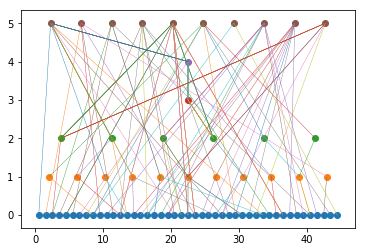

In [10]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [11]:
test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
test_y = digits.target[1617:]

In [12]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = test_y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = test_X[digits_indexes].shape[0]
test_x_inputs =[tuple(c) for c in test_X[digits_indexes].tolist()]
test_x_outputs = [tuple(c) for c in test_y[digits_indexes].reshape(samplesize,1).tolist()]

In [13]:
outputs = []
for xi in test_x_inputs:
    output = winner_net.activate(xi)
    outputs.append(output)


px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
# the index of maximum in each line
test_pred_outputs = np.argmax(px_outputs, axis = 1)
# replace index to real number, from higher number to lower number!!
for i in range(number_of_classification):
    index = number_of_classification - i - 1
    test_pred_outputs[test_pred_outputs==index] = numbers[index]

test_real_outputs = np.array(test_x_outputs).reshape(samplesize,)

In [14]:
test_real_outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9])

In [15]:
test_pred_outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 6, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 4, 2, 2, 2, 5, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2,
       2, 2, 2, 2, 9, 4, 4, 4, 4, 9, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 0, 9, 5, 6, 9, 6, 6, 6,
       6, 2, 5, 5, 6, 5, 5, 6, 4, 6, 5, 4, 6, 5, 6, 6, 9, 9, 9, 4, 9, 9,
       9, 4, 9, 9, 9, 9, 2, 2, 2, 9, 9, 9, 9, 2, 9, 4, 4, 2, 2, 2, 9, 4,
       2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 9, 9, 9, 9, 9, 0, 9, 9, 9, 9,
       2, 2, 9, 9])

In [16]:
np.sum(test_pred_outputs == test_real_outputs)/samplesize

0.4111111111111111

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_pred_outputs, test_real_outputs)
print(cm)

[[14  0  0  0  0  1  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0 19 14 17  4  0  1  3 11  6]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  0  1  0 14  0  2  2  3  0]
 [ 0  0  1  0  0 12  6  0  0  0]
 [ 1  0  1  1  0  2  9  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  3  0 14  2 11]]


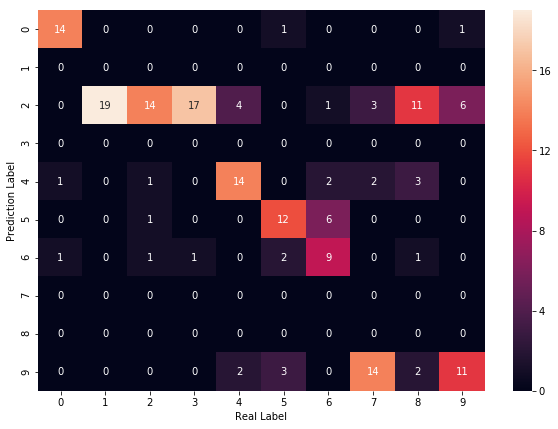

In [18]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [21]:
visualize.draw_net(config, winner, prune_unused=False)
visualize.plot_stats(stats, ylog=False, view=False)
visualize.plot_species(stats, view=False)

array([[14,  0,  0,  0,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 19, 14, 17,  4,  0,  1,  3, 11,  6],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  0, 14,  0,  2,  2,  3,  0],
       [ 0,  0,  1,  0,  0, 12,  6,  0,  0,  0],
       [ 1,  0,  1,  1,  0,  2,  9,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  3,  0, 14,  2, 11]])

In [22]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [23]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [45, 11, 6, 1, 1, 10]


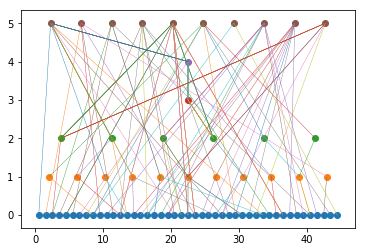

In [24]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [25]:
stats

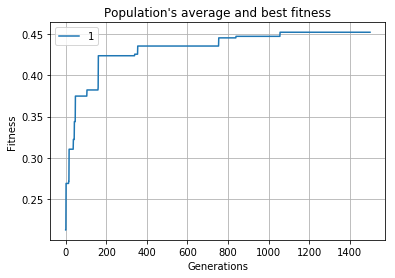

In [27]:

statistics = stats

generation = range(len(statistics.most_fit_genomes))
best_fitness = [c.fitness for c in statistics.most_fit_genomes]
avg_fitness = np.array(statistics.get_fitness_mean())
stdev_fitness = np.array(statistics.get_fitness_stdev())



#plt.plot(generation, avg_fitness, "b-", label="average")
#plt.plot(generation, avg_fitness - stdev_fitness, "g-.", label="-1 sd")
#plt.plot(generation, avg_fitness + stdev_fitness, "g-.", label="+1 sd")

plt.plot(generation, best_fitness, label=i)

plt.title("Population's average and best fitness")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.grid()
plt.legend(loc="best")
plt.show()